
Dota 2 — multiplayer moba computer game. 10 Players divided in two teams Dire and Radiant. There goal is to destroy enemy's base during the match.

This project is the finall assingment in Machine Learing  mooc on courseara by Yandex. 

Data is taken from from [YASP Data Dump](http://academictorrents.com/details/5c5deeb6cfe1c944044367d2e7465fd8bd2f4acf). Authors of the course provided py-script, which parses packed data into csv.

In [2]:
import numpy as np
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import json

%matplotlib inline

In [4]:
features = pd.read_csv('features.csv', header=0, index_col='match_id')
features = features.fillna(0)
features.head(5)

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,...,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,duration,radiant_win,tower_status_radiant,tower_status_dire,barracks_status_radiant,barracks_status_dire
match_id,,,,,,,,,,,,,,,,,,,,,
0,1430198770,7,11,5,2098,1489,20,0,0,7,...,4,2,2,-52.0,2874,1,1796,0,51,0
1,1430220345,0,42,4,1188,1033,9,0,1,12,...,4,3,1,-5.0,2463,1,1974,0,63,1
2,1430227081,7,33,4,1319,1270,22,0,0,12,...,4,3,1,13.0,2130,0,0,1830,0,63
3,1430263531,1,29,4,1779,1056,14,0,0,5,...,4,2,0,27.0,1459,0,1920,2047,50,63
4,1430282290,7,13,4,1431,1090,8,1,0,8,...,3,3,0,-16.0,2449,0,4,1974,3,63


#### Feature descprition

- `match_id`: match id in the data dump
- `start_time`: staring time of the match (unixtime)
- `lobby_type`: lobby type, where players are going to play
- Features set for every player (players of Radiant — prefix `rN`, Dire — `dN`):
    - `r1_hero`: players's hero
    - `r1_level`:maximum level reached (during first 5 minutes)
    - `r1_xp`:   maximum expirience reached
    - `r1_gold`: achieved value of the hero
    - `r1_lh`: number of units killed 
    - `r1_kills`: number of heroes killed
    - `r1_deaths`: number of deaths
    - `r1_items`: number of items buyed
- Features of "first blood" event. If first blood didn't occur during first 5 minutes, the feature will take NA value.
    - `first_blood_time`: game time of first blood
    - `first_blood_team`: team, which made fist blood (0 — Radiant, 1 — Dire)
    - `first_blood_player1`: player involved in the event
    - `first_blood_player2`: second player involved in the event
- Features for every team (prefixes `radiant_` and `dire_`)
    - `radiant_bottle_time`: time of the first purchase of the item "bottle"
    - `radiant_courier_time`: time of the first purchase of the item "courier" 
    - `radiant_flying_courier_time`: time of the first purchase of the item "flying_courier" 
    - `radiant_tpscroll_count`: number of items "tpscroll" during first 5 minutes
    - `radiant_boots_count`: number of items "boots"
    - `radiant_ward_observer_count`: number of items "ward_observer"
    - `radiant_ward_sentry_count`: number of items "ward_sentry"
    - `radiant_first_ward_time`: first placing of "observer", 
- Match results
    - `duration`: duration
    - `radiant_win`: 1, if Radiant won, 0 — else
    - Barracks and towers status
        - `tower_status_radiant`
        - `tower_status_dire`
        - `barracks_status_radiant`
        - `barracks_status_dire`
        
#### In data analyses was used roc-auc metric


### Gradient boosting model

Dataset consists of 90 thousands entries of dota2 match statsics dusring first 5 minutes.
There are a lot of different features, such as heroes, player's exp, gold, items. I'm going to predict winner - binary feature "radiant_win"

Gradient boosting algorithm takes too much time to process, therefore i made separate py-script called *boosting_model.py*. It writes data in json format.

Data file conatain three series: amount of trees, roc-auc scores and time series

In [6]:
stats = json.load(open('gradient_boosting_data'))
n_estimators_space = stats[0]
roc_score = stats[1]
timing = stats[2]
print([i[:3] for i in stats])

[[5, 6, 7], [0.5781472072338822, 0.5855443244812872, 0.590779707056791], [28, 34, 39], [9, 'Optimal n_estimators']]


Learning time was increasing linearly with coefficient 5*(#trees)

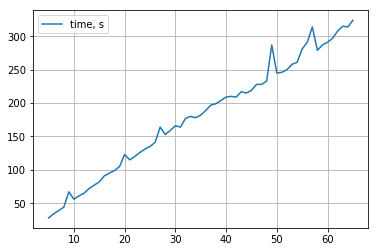

In [7]:
plt.legend(handles=plt.plot(n_estimators_space, timing, label='time, s'))
plt.grid()

## roc-auc graph
Fisrt 20 trees give great insreasing in roc-score, but after 30, every next gives too small profit. Considering lenear time growth, i think, that threse no sense to use more than 30 trees in gradient boosting on this data.
I think, that gradient boosting gives good result "from the box", but his disadvantage is long learning time.


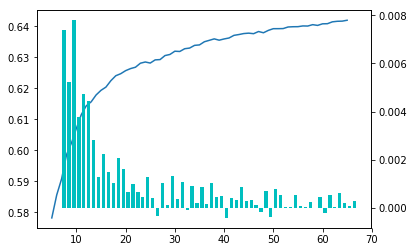

In [9]:
fig = plt.figure()
ax = fig.gca()
ax2 = ax.twinx()

plot1 = ax.plot(n_estimators_space,roc_score)

d_roc = np.diff(roc_score)
N = len(d_roc)
x = np.add(n_estimators_space, 2.5)[:-1]
width = 1/1.5
height=0.2
plot2 = ax2.bar(x, d_roc, width, color="c")
plt.show()

### Logistic regression model

I'll try next the same way Logistic Regression: just "from the box"

In [ ]:
x = ft.copy().drop(['duration', 'radiant_win','tower_status_radiant', 
    'tower_status_dire', 'barracks_status_radiant', 'barracks_status_dire'], axis=1).as_matrix()
x = StandardScaler().fit_transform(x)
y = ft.copy()['radiant_win'].as_matrix()

### containers for metrics
## c_space - values of optimized L2 coefficient in LogisticRegression
metrics = []

grid = {
'C': np.logspace(start=-5, stop=1, num=9)
}

## cross-validation

folder = KFold(shuffle=True, random_state=72365, n_splits=5)
clf = LogisticRegression(penalty='l2', random_state=34532)
gs = GridSearchCV(clf, grid, scoring='roc_auc', cv=folder)
start_time = datetime.datetime.now()
gs.fit(x,y)

print('Best roc-auc score {:.6f} with {:}'.format(gs.best_score_, gs.best_params_))
print('running time: % s' % (datetime.datetime.now() - start_date).seconds)

Threse some possibility to make better logistic model: features like r1_hero, r2_hero, etc. may not be properly used by logisitc model. There isn't really any scructure in this information.

Those features should become categorial: every hero has his own column, where stays 1, if hero is picked by radiant, -1 - by dire, 0 - else.

 Calculate, how many heroes are in the game
 We can calculate the number of unique hero's id at any column,
 because there are 100 hundred thousands of rows.
 All ids assigned from 1 incrementally. Thats why max id = # of heroes

In [83]:

def preprocess_data(features):
    i=0
    cutted_header = list(features)
    features = features.fillna(0)
    while i < len(cutted_header):
        h = cutted_header[i]
        if re.match('[rd][1-5]_hero', h):
            del cutted_header[i]
        elif h == 'lobby_type':
            del cutted_header[i]
        else:
            i+=1
    for i in ['match_id', 'start_time', 'duration', 'radiant_win','tower_status_radiant', 
              'tower_status_dire', 'barracks_status_radiant', 'barracks_status_dire']:
        if i in cutted_header:
            cutted_header.remove(i)  
    x = features.copy()[cutted_header]
    x = StandardScaler().fit_transform(x)
    N = sorted(pd.unique(features['d2_hero']))[-1]

    ## make new features by described scheme
    x_pick = np.zeros((features.shape[0], N))
    for i, match_id in enumerate(features.index):
        for p in range(5):
            x_pick[i, features.loc[match_id, "r%d_hero"% (p+1)]-1] = 1
            x_pick[i, features.loc[match_id, "r%d_hero"% (p+1)]-1] = -1

    x = np.c_[x,x_pick]
    
    y = None
    if 'radiant_win' in list(features):
        y = features.copy()['radiant_win'].as_matrix()
    return x,y



In [ ]:
# cross validate
grid = {
'C': np.logspace(start=-5, stop=2, num=8)
}

folder = KFold(shuffle=True, random_state=72365, n_splits=5)
clf = LogisticRegression(penalty='l2', random_state=7896)
gs = GridSearchCV(clf, grid, scoring='roc_auc', cv=folder)
x,y = preprocess_data(features)
gs.fit(x,y)


In [85]:
print('Best roc-auc score {:.6f} with {:}'.format(gs.best_score_, gs.best_params_))

Best roc-auc score 0.735540 with {'C': 0.10000000000000001}


### Prediction on the test data with best estimator

best_estimator = gs.best_estimator_
ft_test = pd.read_csv('features_test.csv', header=0)
x_test, nan = preprocess_data(ft_test)

match_id = ft_test['match_id'].as_matrix().tolist()

In [97]:
y_proba = best_estimator.predict_proba(x_test)
y_predicted = [proba[1] for proba in  y_proba]
y_s = pd.Series(y_predicted, name='radiant_win')
result_frame = ft_test['match_id'].to_frame().join(y_s)
result_frame.to_csv('proba_win.csv', header=True, index=False)

In [120]:
y_predicted = clf.predict(x_test)
y_s = pd.Series(y_predicted, name='radiant_win')
result_frame = ft_test['match_id'].to_frame().join(y_s)
result_frame2.to_csv('dicrete_win.csv', header=True, index=False)


,match_id,radiant_win
0,6,1
1,7,1
2,10,0
3,13,1
4,16,0
5,18,0
6,19,1
7,24,1
8,33,0
9,37,1


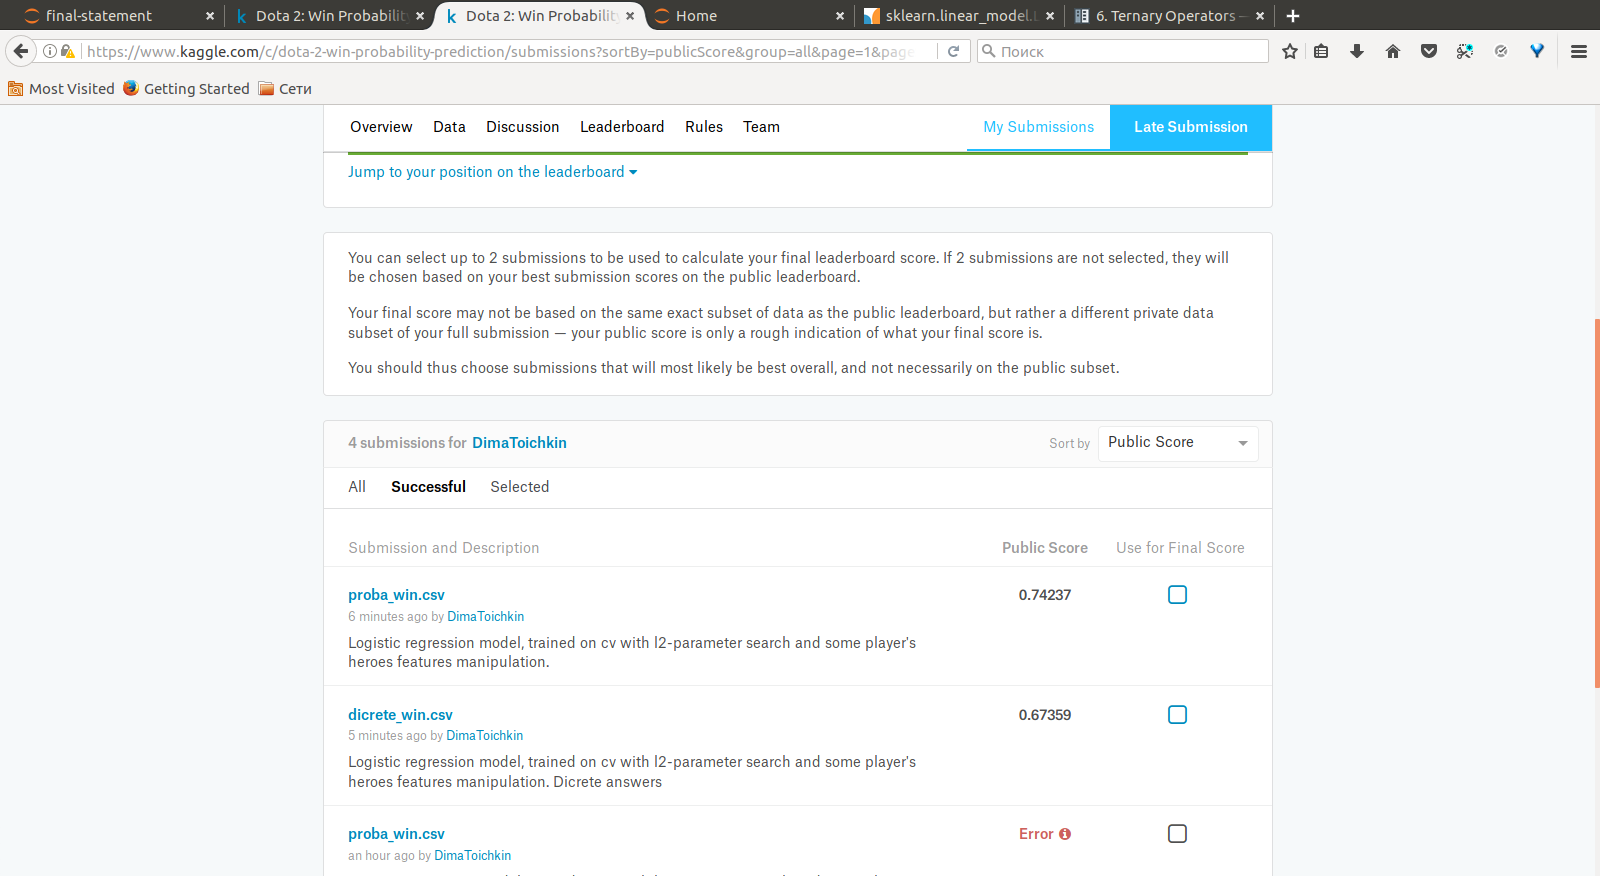